<a href="https://colab.research.google.com/github/sunil1206/STOCK_MARKET/blob/main/Stock_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.) What was the change in price of the stock over time?

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [35]:
# The tech stocks we'll use for this analysis
# energy_list = ['BPCL.NS', 'IOC.NS', 'ADANITRANS.NS', 'RELIANCE.NS','POWERGRID.NS','GAIL.NS','ADANIGREEN.NS','TATAPOWER.NS','NTPC.NS','ONGC.NS']

# Set up End and Start times for data grab
# energy_list = ['BPCL.NS', 'IOC.NS', 'ADANITRANS.NS', 'RELIANCE.NS','POWERGRID.NS','GAIL.NS','ADANIGREEN.NS','TATAPOWER.NS','NTPC.NS','ONGC.NS']
energy_list = ['BPCL', 'IOC', 'ADANITRANS', 'RELIANCE','POWERGRID','GAIL','ADANIGREEN','TATAPOWER','NTPC','ONGC']

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

for stock in energy_list:
    globals()[stock] = yf.download(stock+'.NS', start, end) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [36]:
company_list = [BPCL, IOC, ADANITRANS, RELIANCE,POWERGRID,GAIL,ADANIGREEN,TATAPOWER,NTPC,ONGC]

company_name = ['BPCL', 'IOC', 'ADANITRANS', 'RELIANCE','POWERGRID','GAIL','ADANIGREEN','TATAPOWER','NTPC','ONGC']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)    

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2017-09-11,519.000000,523.799988,510.500000,512.250000,359.883575,3026548,BPCL
2017-09-12,515.900024,535.150024,512.549988,533.849976,375.058716,3957122,BPCL
2017-09-13,536.000000,540.400024,489.000000,500.200012,351.417816,8981024,BPCL
2017-09-14,520.000000,524.900024,487.049988,500.500000,351.628540,15828064,BPCL
2017-09-15,500.000000,503.000000,491.250000,497.250000,349.345306,5342585,BPCL
2017-09-18,504.000000,506.799988,493.350006,497.950012,349.837097,2851570,BPCL
2017-09-19,498.899994,508.200012,493.649994,506.899994,356.124939,3969923,BPCL
2017-09-20,507.000000,507.000000,492.500000,494.299988,347.272736,6309697,BPCL
2017-09-21,495.000000,500.000000,490.750000,496.149994,348.572449,5455368,BPCL


#Summary

In [37]:
# Summary Stats
BPCL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,403.356311,409.200890,396.585477,402.560275,331.973602,6.886395e+06
std,61.383173,61.387128,61.055536,61.055492,54.074904,7.748927e+06
min,252.600006,268.100006,238.550003,257.200012,190.196198,2.063000e+05
25%,356.812508,362.399994,350.925003,356.299988,290.673721,3.652643e+06
50%,393.899994,397.925003,386.199997,392.625000,331.742035,5.250678e+06
75%,453.700005,459.362488,446.824989,453.462509,374.584557,7.825792e+06
max,549.000000,551.549988,535.500000,544.599976,443.271271,1.997910e+08


In [38]:
BPCL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-09-11 to 2022-09-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1236 non-null   float64
 1   High          1236 non-null   float64
 2   Low           1236 non-null   float64
 3   Close         1236 non-null   float64
 4   Adj Close     1236 non-null   float64
 5   Volume        1236 non-null   int64  
 6   company_name  1236 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 77.2+ KB


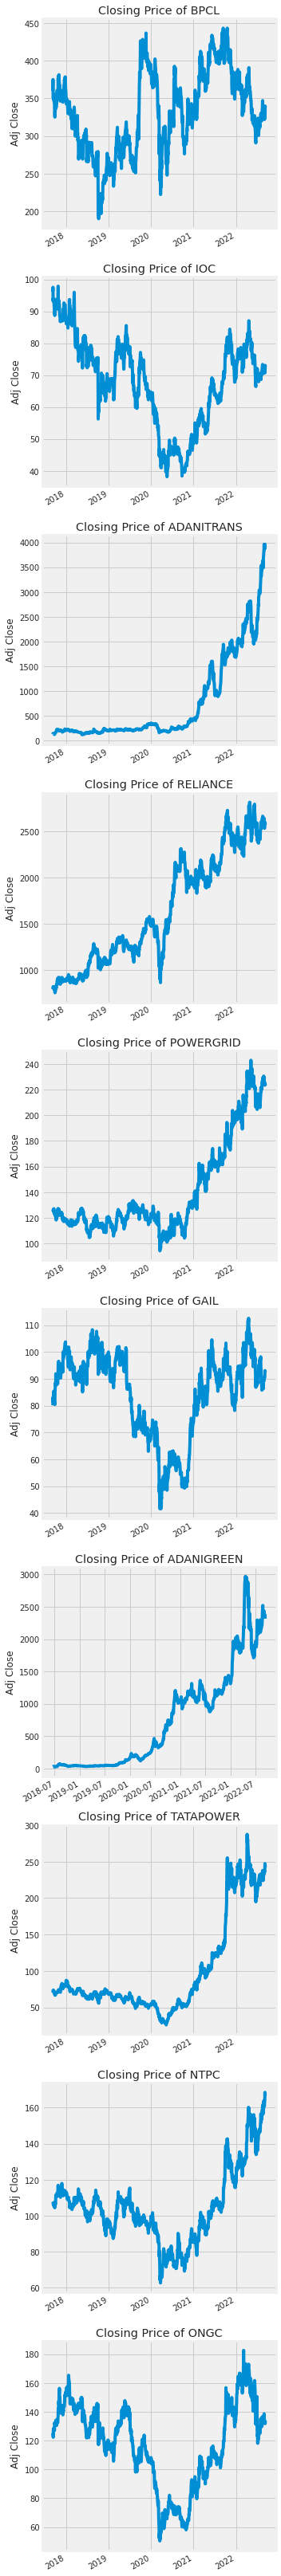

In [39]:
# Let's see a historical view of the closing price


plt.figure(figsize=(5, 45))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(10,1 , i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {energy_list[i - 1]}")
    
plt.tight_layout()

##Best Day of Stock

In [40]:
BPCL['Daily_returns'] = BPCL['Adj Close'].pct_change()*100 #Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.

In [41]:
BPCL[BPCL['Daily_returns']==BPCL['Daily_returns'].max()]['Daily_returns']

Date
2020-03-31    15.341192
Name: Daily_returns, dtype: float64

In [42]:
Top_5_close = BPCL.nlargest(5, "Close")
Top_5_close

,Open,High,Low,Close,Adj Close,Volume,company_name,Daily_returns
Date,,,,,,,,
2019-11-20,528.900024,548.000000,522.049988,544.599976,436.764343,18844498,BPCL,4.942658
2017-11-02,544.900024,546.599976,535.500000,542.849976,381.381744,2486376,BPCL,0.565016
2017-10-31,535.549988,544.349976,527.000000,541.599976,380.503571,3195489,BPCL,0.997677
2017-11-01,542.000000,544.900024,534.049988,539.799988,379.238983,2464379,BPCL,-0.332346
2017-12-26,534.900024,542.500000,530.799988,538.900024,378.606659,2023385,BPCL,0.700731


In [43]:
Top_5_high = IOC.nlargest(5, "High")
Top_5_high

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2017-10-27,147.333328,147.333328,136.800003,138.316666,93.050072,42996768,IOC
2017-09-13,145.983337,147.199997,136.000000,138.649994,93.274323,34109007,IOC
2017-10-26,139.683334,146.666672,139.516663,145.500000,97.882523,34884822,IOC
2017-09-12,144.283340,145.600006,143.333328,144.966660,97.523735,8390709,IOC
2017-09-11,144.333328,145.316666,142.633331,143.016663,96.211914,7362534,IOC


In [44]:
IOC

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2017-09-11,144.333328,145.316666,142.633331,143.016663,96.211914,7362534,IOC
2017-09-12,144.283340,145.600006,143.333328,144.966660,97.523735,8390709,IOC
2017-09-13,145.983337,147.199997,136.000000,138.649994,93.274323,34109007,IOC
2017-09-14,143.666672,144.833328,137.800003,139.899994,94.115204,26482008,IOC
2017-09-15,140.000000,141.666672,137.766663,138.550003,93.207047,15596769,IOC
...,...,...,...,...,...,...,...
2022-09-05,71.500000,71.650002,70.849998,70.949997,70.949997,11658725,IOC
2022-09-06,71.150002,71.199997,70.599998,70.699997,70.699997,10545363,IOC
2022-09-07,70.800003,71.550003,70.699997,71.400002,71.400002,19254652,IOC


In [45]:
Top_5_volume = IOC.nlargest(5, "Volume")
Top_5_volume

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-01-23,76.733330,80.599998,76.699997,78.900002,60.135201,314893702,IOC
2022-03-30,79.800003,79.800003,77.400002,78.133331,75.546844,159640347,IOC
2020-07-21,58.866665,63.133331,58.466667,62.299999,49.820221,140856196,IOC
2021-05-24,70.000000,73.266663,70.000000,72.966667,64.842400,124798564,IOC
2018-10-05,84.199997,84.199997,70.166664,78.699997,56.256954,121328101,IOC


In [51]:
import plotly.graph_objects as go

plt.figure(figsize=(24,16))
fig = go.Figure(data=[go.Candlestick(x=df.index, 
                open=IOC['Open'],
                high = IOC['High'],
                low = IOC['Low'],
                close = IOC['Close'])])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

<Figure size 1728x1152 with 0 Axes>

In [48]:
import plotly.graph_objects as go

plt.figure(figsize=(24,16))
fig = go.Figure(data=[go.Candlestick(x=df.index, 
                open=BPCL['Open'],
                high = BPCL['High'],
                low = BPCL['Low'],
                close = BPCL['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 1728x1152 with 0 Axes>

In [49]:
import cufflinks as cf
cf.go_offline()
BPCL = BPCL[['Open', 'High', 'Low', 'Close']].loc['2019-11-21':'2019-11-30']
BPCL.iplot(kind='candle')